# Regresión lineal con Python y scikit-learn

## Introducción a la regresión lineal

En este curso se va explorar como realizar regresión lineales con Python, junto con su paquete de aprendizaje automatico (machine learning) llamada scikit-learn, las regresiones lineales son utiles para predecir resultados futuros.

## Importar datos

In [7]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
                 header = None, # Se está especificando que ignore el encabezado 
                 sep='\s+') # Se está indicando que la separación en el archivo se realiza por espacios 
df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'] # Se asigna nombre a cada una de las columnas 
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Conociendo los datos

El dataset utilizado para este curso es el de [Housing](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data) que es un estudio acerca del precio de casas en la ciudad de Boston en los Estados Unidos. Las columnas de datos se refieren a la siguiente información: 

1. **CRIM**: tasa de criminalidad per capita por barrio
2. **ZN**: proporción de terrenos residenciales zonificados para lotes de más de 25000 pies cuadrados
3. **INDUS**: proporcion de acres (4046 metros cuadrados) de negocios no minoristas por ciudad
4. **CHAS**: es una variable que hace referencia a la cercanía al río Charles (para terrrenos, 1= si es cercana, 0 = si no es cercana)
5. **NOX**: concentración de óxidos nítricos (partes por cada 10 millones)
6. **RM**: número promedio de habitaciones por vivienda
7. **AGE**: proporción de unidades ocupadas por sus propietarios antes de 1940
8. **DIS**: distancia ponderada a cinco centros de empleos en Boston
9. **RAD**: indice de accesibilidad a carreteras radiales 
10. **TAX**: tasa de impuestos sobre la propiedad de valor total por cada 10.000 USD
11. **PTRATIO**: relación alumno-maestro por barrio 
12. **B**: 1000(Bk - 0.63)^2 donde bk es proporción de afroamericanos por barrio
13. **LSTAT**: porcentaje (%) de estatus social bajo de la población
14. **MEDV**: valor medio de las viviendas ocupadas por sus propietarios en miles de dolares (1000 usd)


Se tienen 506 muestras y 14 atributos respectivamente.


## Entendiendo los datos 

Teniendo el dataset ya asignado, se puede proceder a realizar análisis respecto a los datos, para ello en primera instancia es necesario observar las correlaciones que existen, ya que el modelo de regresión lineal está basado en que tan relacionadas estén las variables. Para ello es útil realizar un **pairplot** de seaborn.

/home/nico9779/anaconda3/envs/regresion_lineal/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


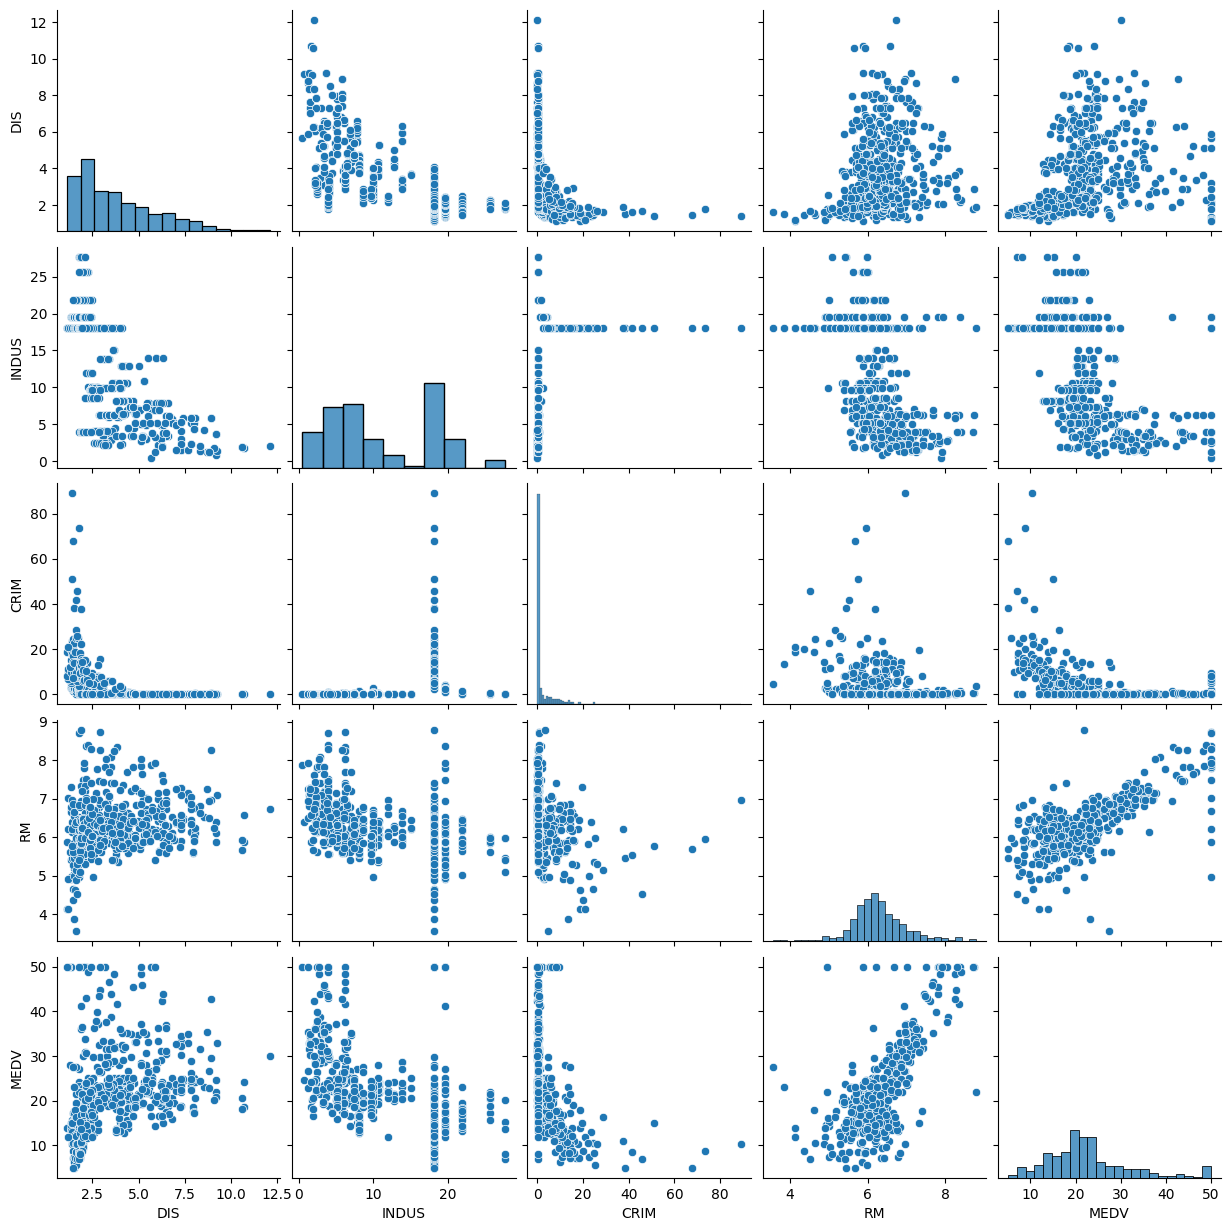

In [8]:
# Importación de librerias 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
# Configuración de la apariencia de los graficos
#sns.set(style='whitegrid',context = 'notebook')
# Se seleccionan cinco variables para realizar el análisis
cols = ['DIS','INDUS','CRIM','RM','MEDV']
sns.pairplot(
    df[cols],
    height=2.5
)
plt.show()

La variable objetivo a predecir es **MEDV**, que hace referencia al valor medio de las propiedades, de forma visual se busca una variable que presente una correlación significativa con esta. Se encuentra que **RM**, la cual habla de la cantidad de habitaciones por propiedad, parece tener una correlación positiva con MEDV. Para comprobar esto, es necesario realizar un análisis numérico que lo confirme, en ese caso es útil utilizar una matríz de correlación que puede traducirse de forma visual a un mapa de calor.

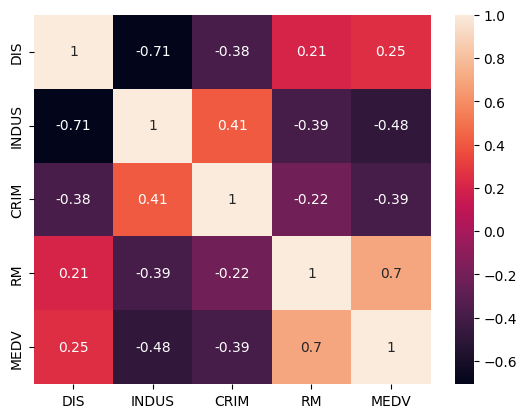

In [9]:
cm = np.corrcoef(df[cols].values.T)  # Matríz de correlación, se extraen los valores con values y se debe transponer para utilizarse en el heatmap
sns.heatmap(
    cm,
    cbar=True,
    annot = True,
    xticklabels= cols,
    yticklabels=cols
)
plt.show()

Del grafico anterior se puede extraer la siguiente información:

- La variable **RM** tiene una fuerte correlación positiva con **MEDV**, en este caso de 0.7. Lo que podría indicar que a mayor número de habitaciones, mayor el precio de las viviendas
- La variable **INDUS** tiene una correlación media negativa con **MEDV** de -0.48. Lo que podría indicar que a mayor proporción de negocios no minoristas, es menor el precio medio de las viviendas. 
    

# Entrenando un modelo de regresión lineal con scikit-learn

Un modelo de regresión lineal busca predecir valores numéricos con base a la linea recta que mejor se ajusta a la tendencia de los datos. La formula de la regresión lineal incluye interceptos, que sería equivalente al valor de la variable dependiente cuando la variable independiente es cero, además de la pendiente que posea la recta que se traduce como tan pronunciado es el crecimiento de la variable dependiente con respecto a la independiente. El ajuste de la linea recta se realiza al minimizar la diferencia de los errores cuadrados.

En el caso de estudio, se busca predecir el valor medio de las casa **MEDV** con respecto al número de habitaciones **RM**. RM es la variable independiente **x** y MEDV la variable dependiente **y**.

**Nota**: 
- Se utiliza la forma reshape(-1,1) ya que es la forma como scikit-learn puede operar los arrays, el -1 le está diciendo al programa que prediga el shape con base a la lista original.

### Elementos a utilizar de scikit-learn

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

Creación de variables que van a ser ingresadas en el modelo de regresión lineal

In [11]:

x = df['RM'].values.reshape(-1,1) # Número de habitaciones por casa
y = df['MEDV'].values.reshape(-1,1) # Valor medio de las casas en miles 

Estandarización de las variables, recordando que la estandarización se refiere a :
$$ z = \frac{x-\mu}{\sigma}$$


In [12]:
sc_x = StandardScaler()
sc_y = StandardScaler()
x_std = sc_x.fit_transform(x)
y_std = sc_y.fit_transform(y)

Creación modelo regresión lineal

In [13]:
slr = LinearRegression()
slr.fit(x_std,y_std)

LinearRegression()

Graficación de los datos

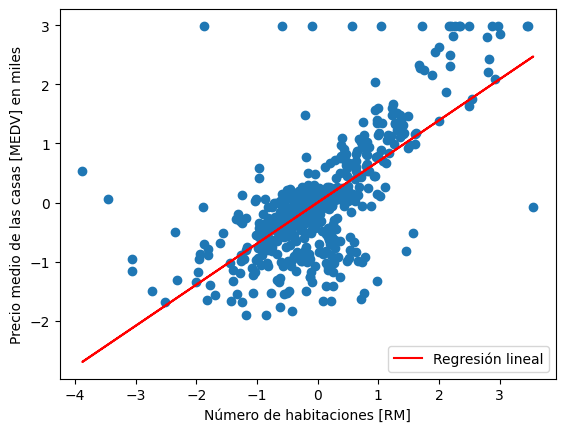

In [14]:
plt.scatter(x_std,y_std)
plt.plot(x_std,slr.predict(x_std),color='r',label='Regresión lineal')
plt.xlabel('Número de habitaciones [RM]')
plt.ylabel('Precio medio de las casas [MEDV] en miles')
plt.legend()
plt.show()

Teniendo un modelo que sirve para realizar predicciones, lo siguiente es comprobarlo con un valor arbitrario de nuestra variable numéro de casa [RM]

In [15]:
num_habitaciones = 5
num_habitaciones_std = sc_x.transform(np.array([num_habitaciones]).reshape(-1,1)) # Se estandariza el valor de número de habitaciones 
num_habitaciones_std 

array([[-1.83016553]])

In [16]:
result = sc_y.inverse_transform(slr.predict(num_habitaciones_std))
print(f'El valor de una casa con 5 habitaciones es de {result*1000} dolares')

El valor de una casa con 5 habitaciones es de [[10839.92412946]] dolares


Para otro valor, en este caso 7 habitaciones 

In [17]:
num_habitaciones2 = 7
num_habitaciones2_std = sc_x.transform(np.array([num_habitaciones2]).reshape(-1,1))
num_habitaciones2_std

array([[1.01915183]])

In [18]:
result2 = sc_y.inverse_transform(slr.predict(num_habitaciones2_std))
print(f'El valor de una casa con 7 habitaciones es de {result2*1000} dolares')

El valor de una casa con 7 habitaciones es de [[29044.14209182]] dolares


# ¿Cómo funciona la regresión lineal?
## ¿Que es la regresión lineal?

La regresión lineale es un algoritmo de aprendizaje automático supervisado (machine learning) que es utilizado para modelar la relación entre una variable dependiente $Y$  y una o más variable independientes $X$. El objetivo del modelo es encontrar la linea recta que mejor se ajusta al conjunto de los datos, esto para poder realizar predcciones.

## Definición de la hipotesis:

La siguiente explicación se realizará para una regresión lineal simple, que consta de una variable independiente y otra dependiente unicamente. 

La hipotesis de regresión lineal dice que si existe una relación lineal entre las variable dependiente $Y$ y la variable independiente $X$, se puede explicar por la siguiente formula:

$y = w0+w1x+\mathcal{E}$

Donde:

- $y$: La variable dependiente o variable a predecir
- $x$: La variable independiente
- $w0$: El intercepto de la función, el valor que tomaría $y$ si $x$ es cero
- $w1$: Coeficiente de regresión o pendiente de la función, este determina que tan pronunciado es el crecimiento de la variable dependiente
- $\mathcal{E}$: El error asociado a las predicciones, está determinado por la diferencia entre los valores reales y los predichos

En inteligencia artificial $w0$ y $w1$ corresponden a los pesos del modelo y son utilizados como referencia para determinar la importancia relativa de cada variable de entrada con respecto a la de salida. Son muy utilizados en deep learning en el momento de modelar redes neuronales.




# ¿Cuándo utilizar un modelo de regresión lineal?

- ¿Tengo una variable dependiente numérica que quiero predecir a partir de una variable independiente numérica?
En el caso es viable utilizar el modelo de regresión lineal
- ¿Cuento con una gran cantidad de variables y/o variables categóricas de diferentes niveles?
En el caso de tener gran cantidad de variables el modelo de regresión lineal se vería comprometido por la misma cantidad de éstas,para variables categóricas sería más adecuados utilizar modelos de clasifiación como la regresión logistica y random forest,

# Recomendaciones para identificar si la regresión lineal es el modelo indicado en un caso ezspecifico

- **Probar otros modelos**

Revisar si otros modelos pueden ser utiles para el caso especifico de estudio como pueden ser la regresión logistica, random forest u otros modelos
- **Reducción de variables**

Si se tienen muchas variables independientes se puede sufrir de overfitting o sobreajustamiento, también se pueden generar inconvenientes si se ingresan al modelo variables independientes poco relevantes, para ello se sugiere realizar una matríz de correlación, donde se pueda evidenciar la relación entre multiples variables y así poder elegir las más adecuaadas para la construcción del modelo

- **Multicolinealidad**

La multicolinealidad ocurre cuando existen dos variables que poseen una alta correlación entre sí pero que no están aportando variación al modelo, esto puede ser porque están explicando comportamientos similares o en muchos casos iguales, como podría ser tener en un conjunto de datos,una variable que explique el peso de una población en libras y otra en kilogramos. En el caso anterior las dos variables están aportando la misma información. 

- **No predecir fuera del dominio de la variable independiente**

Es importante realizar las predicciones dentro de los limites de la variable independiente ya que al realizarlas por fuera de este podría llevarse a datos poco confiables.

# Función de perdida y optimización de mínimos cuadrados

El MSE (Mean Squared Error) o Error Cuadrático Medio es una medida para cuantificar el rendimiento de modelos de regresión. El MSE equivale al promedio de los errores al cuadrado, esto se obtiene de realizar la diferencia entre cada uno de los valores reales con sus respectivos valores obtenidos de la predicción.

Para calcualr el MSE se utiliza la siguiente formula:

$$MSE = \frac{1}{n}(\sum(y{i}-\hat{y{i}})^2)  $$

Donde:

- $n$: la cantidad de datos
- $y{i}$: Es el valor real del punto i-ésimo de los datos
- $\hat{y{i}}$ : Es el valor predicho del punto i-ésimo para los datos

Teniendo en cuenta la formula de MSE se puede determinar a partir de derivadas parciales, las ecuaciones que corresponden al  intercepto ($w0$) y del coeficiente de regresión o pendiente ($w1$), recordando que:

$$ y = w0+w1x $$

A partir de las derivadas parciales se tienen las siguientes ecuaciones:

$$ w1 = \frac{n(\sum(xy))-(\sum(x))(\sum(y))}{(n(\sum(x^2))-(\sum(x))^2)} $$

$$ w0 = \frac{(\sum(y))-m(\sum(x))}{n} $$


## Evaluando el modelo : $R^2-MSE$

Es importante cuantificar que tan bien o mal se están realizando las predicciones, para ello sos utiles las métricas, las más utilizadas son el $R^2$ y el $MSE$. Es relevante realizar esta medición ya que se podría estar llegando a un sobreajuste de las variables o en otros casos una subestimación de las variables independientes, dandoles menos importancia que la que si tienen para predecir la variable objetivo.

Recordando que el MSE equivale al promedio de los errores al cuadrado, esto se obtiene de realizar la diferencia entre cada uno de los valores reales con sus respectivos valores obtenidos de la predicción.

### El coeficiente de determinación $R^2$:

Es una métrica que indica el porcentaje de variabilidad de la variable independiente real que puede ser representado por su valor correspondiente obtenido de una regresión lineal. Eso quiere decir que $R^2$ mide la calidad del ajuste del modelo a los datos. El coeficiente tiene un rango de $[0,1]$,donde 0 corresponde a una relación nula o inexistente y 1 que el modelo explica toda la variabilidad. Esto quiere a decir que entre más cerca este a uno, mayor será el ajuste del modelo con respecto a los datos.


### Otras métricas importantes:

- **R ajustada ($R^2$ ajustada)** : Es una medida de la cantidad de variación en la variable independiente que puede ser explicada por la variable independiente. A diferencia del $R^2$ normal, R ajustada penaliza la inclusión de variable irrelevantes o redundantes en el modelo.
- **Error máximo**: mide el mayor error absoluto que se encuentra en las predicciones del modelo.Útil para identificar valores que se alejan de la linea de regresión y pueden afectar la calidad del modelo.
- **Error absoluto promedio ($MAE$)**: el MAE mide el promedio de los valores absolutos de los errores en las predicciones del modelo. Permite identificar la magnitud promedio de los errores de la predicción
- **Mediana de los errores absolutos**: Es una medida de tendencia central obtenida a partir del ordenamiento de los errores absolutos obtenidos de las predicciones, en esta se puede ver como se distribuyen los datos. Es útil cuando los datos se encuentran sesgados y la media no es una medida representativa. 
- **Raíz del promedio de los errores cuadrados (RMSE)**: el RMSE mide el promedio de los errores entre los valores de la variable dependiente y su valores predichos. Es útil para medio los modelos de regresión.
- **Varianza explicada**: mide la cantidad de varianza de la variable dependiente que puede ser explicada por la variable independiente en el modelo. Es útil para comparar diferentes modelos entre sí.



### La grafica de residuales

La grafica de residuales es una herramienta visual de diagnóstico que permite evaluar la calidad del modelo de regresión lineal. En la grafica se grafican los residuales (diferencia entre valores observados y valores predichos) en el eje vertical, mientras que en el eje horizontal se grafican los valores predichos. 

Una grafica que explique un buen modelo de regresión está dada por una distribución aleatoria cerca del cero en el eje vertical. En el caso de formarse un patrón de datos diferente, esto podría sugerir que el modelo no es el adecuado en ese caso.

# Regresión lineal multivariable

# Creando el modelo con sklearn

In [19]:
x_mult = df[['RM','INDUS']].values # Número de habitaciones por casa, proporción de negocios no minoristas por barrio 
y_mult = df['MEDV'].values.reshape(-1,1) # Valor medio de las casas en miles 

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
sc_x = StandardScaler()
sc_y = StandardScaler()
x_std_mult = sc_x.fit_transform(x_mult)
y_std_mult = sc_y.fit_transform(y_mult)

In [21]:
slr = LinearRegression()
slr.fit(x_std_mult,y_std_mult)

LinearRegression()

In [22]:

x1_mult_range = np.arange(df['RM'].min(),
                          df['RM'].max()) # Rango de los valores de la variable número de habitaciones
x2_mult_range = np.arange(df['INDUS'].min(),
                          df['INDUS'].max()) # Rango de los valores de la variable INDUS

X1,X2 = np.meshgrid(x1_mult_range,x2_mult_range) # Malla de puntos que contiene todos los valores de las variables RM e INDUS

plane = pd.DataFrame({'RM':X1.ravel(), # Creación de un dataframe con todas las combinaciones posible de las variables predictoras
                    'INDUS':X2.ravel()})
pred = slr.predict(plane).reshape(X1.shape)
pred = sc_y.inverse_transform(pred)

/home/nico9779/anaconda3/envs/regresion_lineal/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


### Graficación de los resultados 

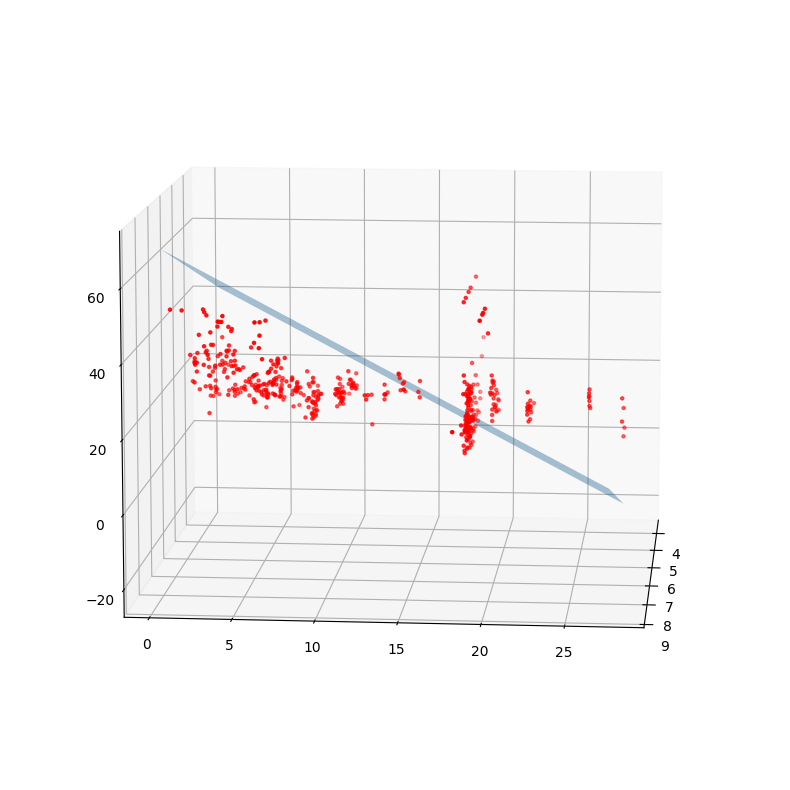

In [23]:
from mpl_toolkits.mplot3d import *

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X1,
                X2,
                pred,
                alpha=0.4)
ax.scatter3D(df['RM'],
             df['INDUS'],
             df['MEDV'],
             marker='.',
             color='r')
ax.view_init(elev=10,azim=5)
plt.show()

## Utilizando plotly

In [26]:
import plotly.express as px
import plotly.graph_objects as go

# Plotting

mesh_size = 0.02
margin = 0

fig = px.scatter_3d(df,x='RM',y='INDUS',z='MEDV')
fig.update_traces(marker=dict(size=5))
fig.add_traces(go.Surface(x=X1,y=X2,z=pred,name='pred_surface'))
fig.show()

# Proyecto practico
## Regresión lineal para predecir los gastos médicos de pacientes

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
medical_costs = pd.read_csv('insurance.csv')
medical_costs.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [126]:
print(medical_costs.shape) # Dimensiones del dataframe, posee 1338 filas y 7 columnas

(1338, 7)


<Axes: >

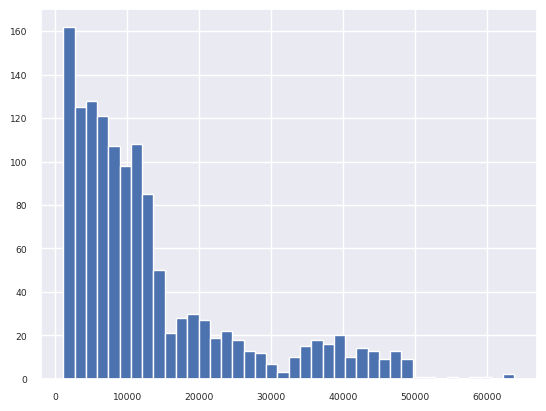

In [127]:
medical_costs.charges.hist(bins=40) # Se verifica la distribución de los datos, allí se observa que parecen ser pocos los casos de mas de 50000 en cargos

In [2]:
medical_costs[medical_costs.charges > 50000] # Se verifica cuantos son los casos en los que los gastos superan los 50000, se puede ver que son 7

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


In [129]:
medical_costs = medical_costs[medical_costs.charges<50000] # Se eliminan los registros mayores a 50000 en los cargos, esto se realiza de forma didactica. En la vida profesional siempre se debe indagar si es adecuado eliminar

## Observando correlaciones

/home/nico9779/anaconda3/envs/regresion_lineal/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


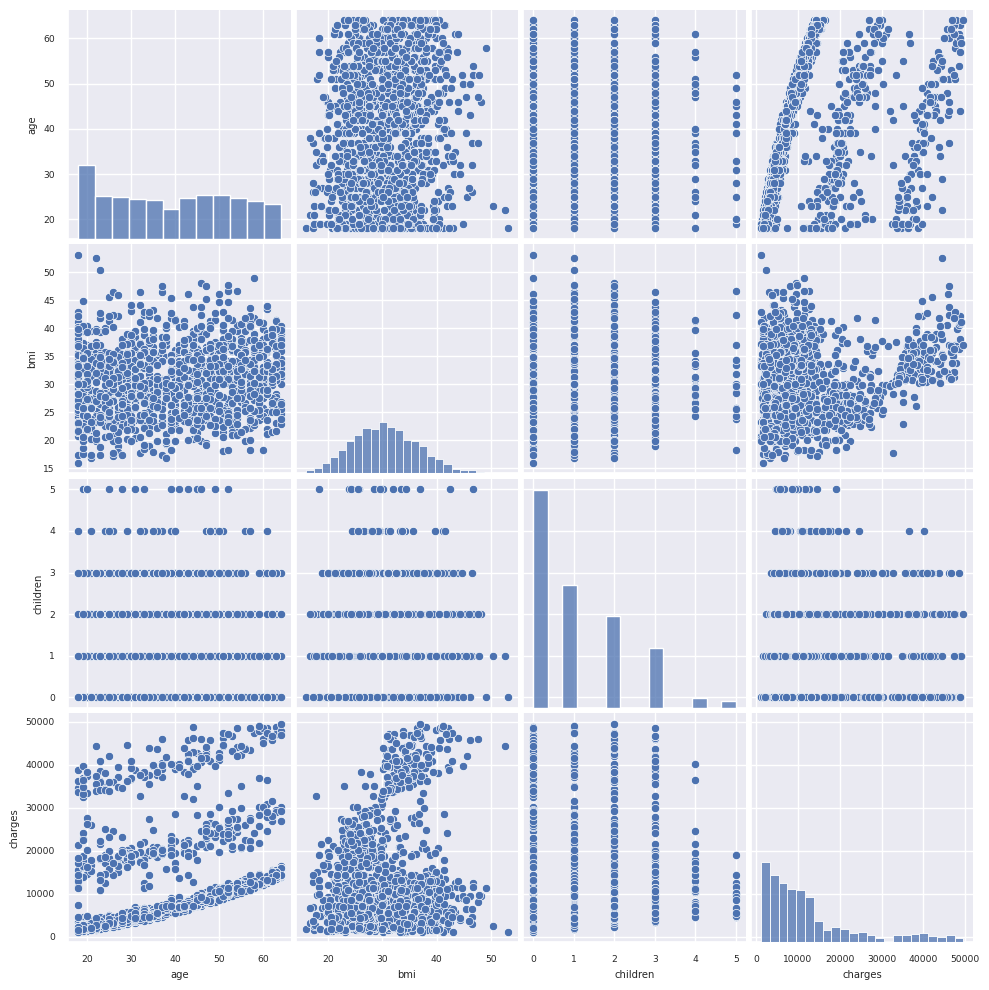

In [130]:
sns.pairplot(medical_costs,height=2.5)
plt.show()

<Axes: >

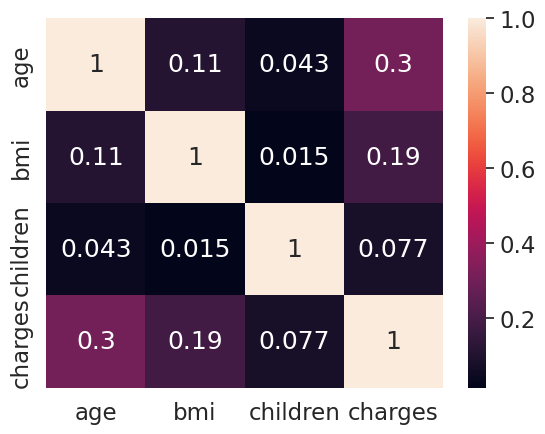

In [131]:
numerical_cols = ['age','bmi','children','charges']
cm= np.corrcoef(medical_costs[numerical_cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm,annot=True,xticklabels=numerical_cols,yticklabels=numerical_cols)

In [3]:
medical_costs = pd.get_dummies(medical_costs,
               columns = ['sex','smoker','region'],
               dtype = int,
               drop_first= True) # Se define el dataframe con las variables categoricas codificadas 

/home/nico9779/anaconda3/envs/regresion_lineal/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


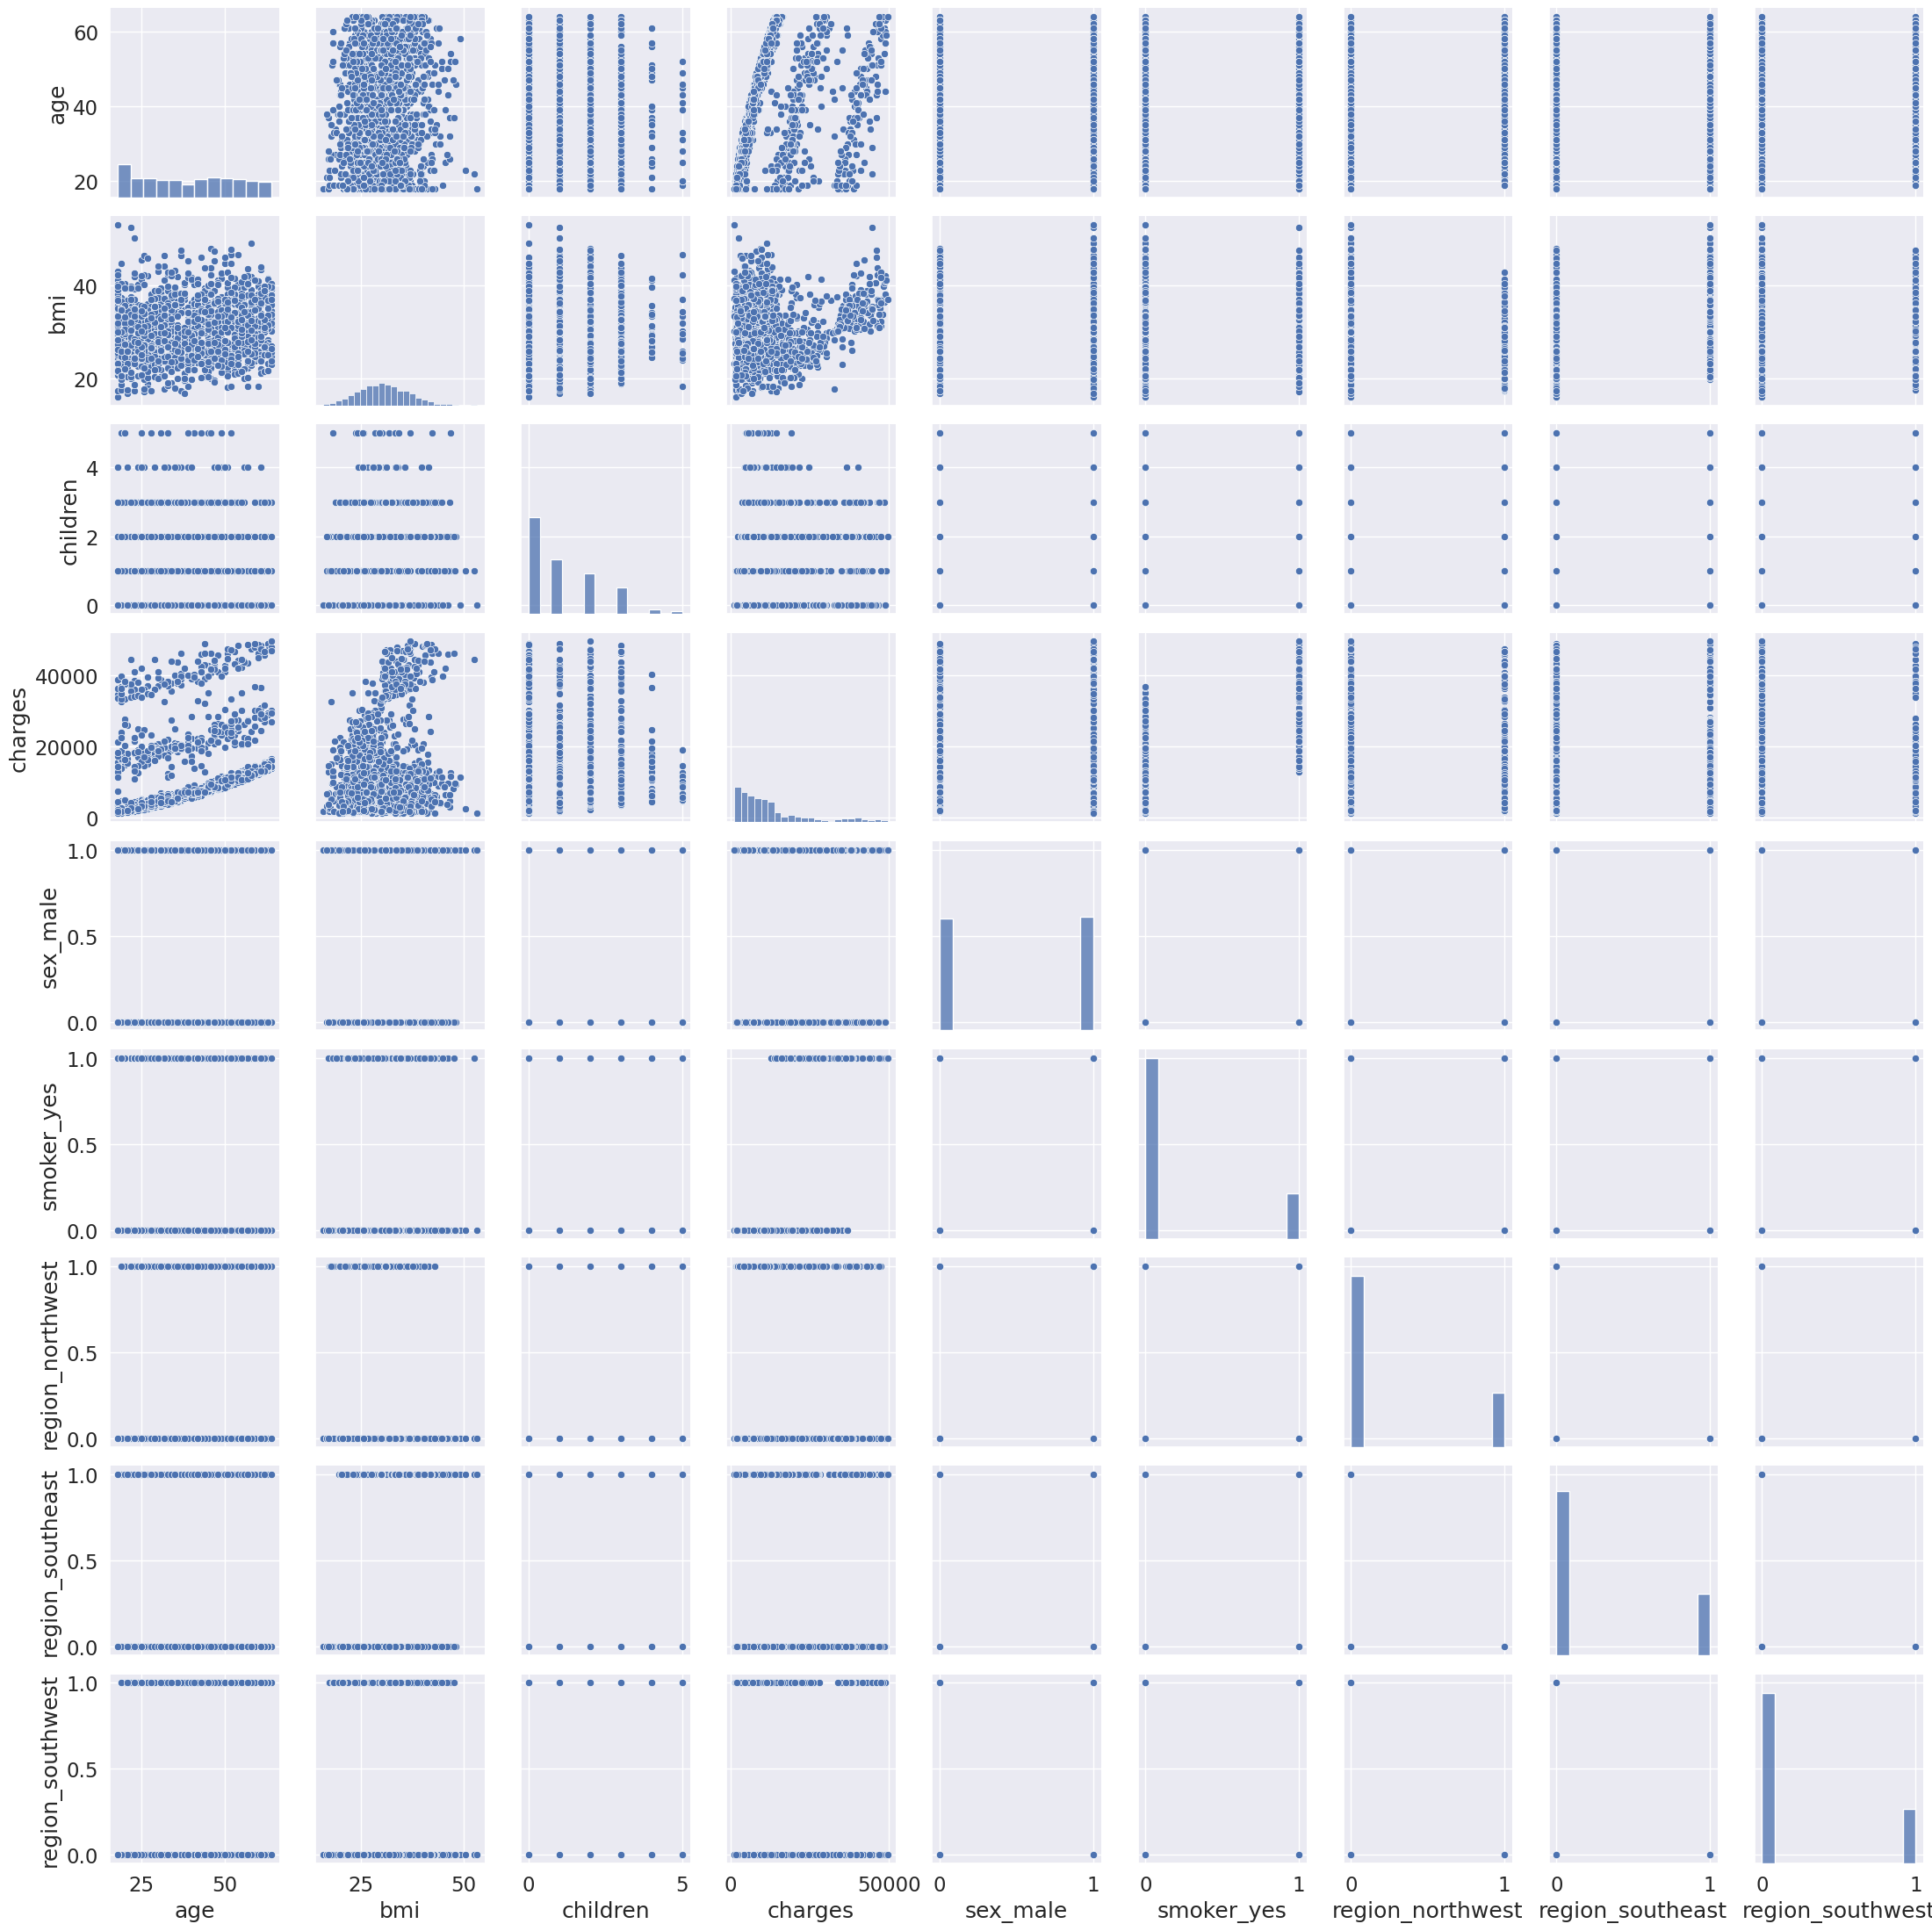

In [133]:
sns.pairplot(medical_costs,height=2.5)

<Axes: >

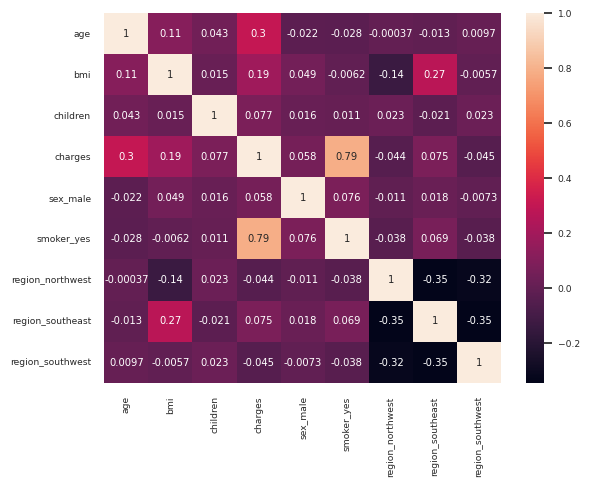

In [134]:
cm= np.corrcoef(medical_costs.values.T)
sns.set(font_scale=0.6)
sns.heatmap(cm,annot=True,xticklabels=medical_costs.columns,yticklabels=medical_costs.columns) 

## Creando modelos

In [9]:
from sklearn.preprocessing import StandardScaler # Se utiliza para estandarizar los datos
from sklearn.linear_model import LinearRegression # Se utiliza para crear la regresión lineal
from sklearn.model_selection import train_test_split # Se utiliza para crear los conjuntos de datos de entrenamiento (train) y de prueba (test)

In [10]:
x_cols = list(set(medical_costs.columns)-set(['charges'])) # Se está seleccionando todas las columnas menos la que se va predecir 'charges'
y_col = ['charges'] # Variable a predecir

x_medical = medical_costs[x_cols].values
y_medical = medical_costs[y_col].values

# Obtención de los conjuntos de datos de datos de entrenamiento (train) y prueba (test), el 75% se utilizan para entrenamiento y 25% para pruebas
x_train, x_test, y_train, y_test = train_test_split(x_medical,y_medical,test_size=0.25,random_state=42)

# Estandarización de los datos 

# Variables independientes
sc_x= StandardScaler().fit(x_medical)
x_train = sc_x.transform(x_train)
x_test = sc_x.transform(x_test)

# Variables dependientes
sc_y= StandardScaler().fit(y_medical)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

# Creación y entrenamiento del modelo de regresión lineal 

model = LinearRegression()
model.fit(x_train, y_train)

# Se realizan predicciones a partir del modelo y con los datos de prueba (test)

y_pred = model.predict(x_test)
y_pred.shape # Cantidad de valores predichos de la variable 'charges'

(335, 1)

## Evaluando el modelo

In [11]:
import sklearn.metrics as metrics 
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
R2 = metrics.r2_score(y_test,y_pred)

print(f'Error absoluto medio (MAE) : {MAE.round(4)}')
print(f'Error medio cuadrado (MSE) : {MSE.round(4)}')
print(f'Coeficiente de determinación (R2) : {R2.round(4)}')



Error absoluto medio (MAE) : 0.3506
Error medio cuadrado (MSE) : 0.2396
Coeficiente de determinación (R2) : 0.7673


In [15]:
from regressors import stats

model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)



In [16]:
y_test = y_test.reshape(-1)
print('*'*16,'Summary','*'*16)
stats.summary(model,x_test,y_test,x_cols)

**************** Summary ****************
Residuals:
    Min      1Q  Median     3Q    Max
-1.8942 -0.1449  0.0939 0.2451 0.8632


Coefficients:
                  Estimate  Std. Error  t value   p value
_intercept        0.000919    0.026870   0.0342  0.972738
bmi               0.171114    0.027575   6.2055  0.000000
children          0.042456    0.026981   1.5736  0.116532
region_southeast -0.028724    0.032051  -0.8962  0.370786
age               0.301214    0.026863  11.2130  0.000000
region_southwest -0.030475    0.032387  -0.9409  0.347413
region_northwest -0.012581    0.032182  -0.3909  0.696093
sex_male          0.001884    0.027487   0.0686  0.945388
smoker_yes        0.787733    0.027254  28.9032  0.000000
---
R-squared:  0.76726,    Adjusted R-squared:  0.76155
F-statistic: 134.34 on 8 features


### Grafica de residuales

[]

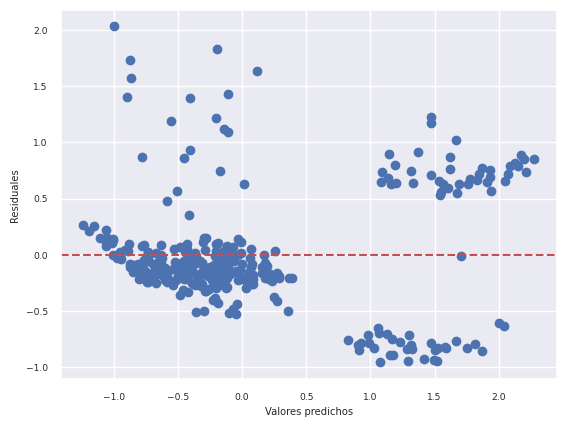

In [217]:
residuals = np.subtract(y_test,y_pred.reshape(-1))
plt.scatter(y_pred,residuals)
plt.axhline(y=0,color='r',linestyle='--')
plt.xlabel('Valores predichos')
plt.ylabel('Residuales')
plt.plot()

## Segundo modelo 

Los resultados del anterior análisis se pueden mejorar, por ello se realizarán unos ajustes y se crearán nuevas variables

In [35]:
medical_costs_2 = medical_costs.copy(deep=True)
medical_costs_2['age2'] = medical_costs_2.age**2 # Creación variable edad al cuadrado 
medical_costs_2['sobrepeso'] = (medical_costs_2.bmi > 30).astype(int) # Creación variable sobrepeso, cuando el bmi es mayor a 30 se toma como un 1
medical_costs_2['sobrepeso_fumador'] = medical_costs_2['sobrepeso']*medical_costs_2['smoker_yes']

In [36]:
medical_costs_2

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age2,sobrepeso,sobrepeso_fumador
0,19,27.900,0,16884.92400,0,1,0,0,1,361,0,0
1,18,33.770,1,1725.55230,1,0,0,1,0,324,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0,784,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0,1089,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0,1024,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0,2500,1,0
1334,18,31.920,0,2205.98080,0,0,0,0,0,324,1,0
1335,18,36.850,0,1629.83350,0,0,0,1,0,324,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1,441,0,0


In [37]:
x_cols = list(set(medical_costs_2.columns)-set(['charges'])) # Se está seleccionando todas las columnas menos la que se va predecir 'charges'
y_col = ['charges'] # Variable a predecir

x_medical = medical_costs_2[x_cols].values
y_medical = medical_costs_2[y_col].values

# Obtención de los conjuntos de datos de datos de entrenamiento (train) y prueba (test), el 75% se utilizan para entrenamiento y 25% para pruebas
x_train, x_test, y_train, y_test = train_test_split(x_medical,y_medical,test_size=0.25,random_state=42)

# Estandarización de los datos 

# Variables independientes
sc_x= StandardScaler().fit(x_medical)
x_train = sc_x.transform(x_train)
x_test = sc_x.transform(x_test)

# Variables dependientes
sc_y= StandardScaler().fit(y_medical)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

# Creación y entrenamiento del modelo de regresión lineal 

model = LinearRegression()
model.fit(x_train, y_train)

# Se realizan predicciones a partir del modelo y con los datos de prueba (test)

y_pred = model.predict(x_test)
y_pred.shape # Cantidad de valores predichos de la variable 'charges'

(335, 1)

In [38]:
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
R2 = metrics.r2_score(y_test,y_pred)

print(f'Error absoluto medio (MAE) : {MAE.round(4)}')
print(f'Error medio cuadrado (MSE) : {MSE.round(4)}')
print(f'Coeficiente de determinación (R2) : {R2.round(4)}')

Error absoluto medio (MAE) : 0.1977
Error medio cuadrado (MSE) : 0.131
Coeficiente de determinación (R2) : 0.8728


In [39]:
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [40]:
y_test = y_test.reshape(-1)
print('*'*16,'Summary','*'*16)
stats.summary(model,x_test,y_test,x_cols)

**************** Summary ****************
Residuals:
    Min     1Q  Median     3Q    Max
-1.7375 0.0616  0.1076 0.1369 0.3146


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept         0.001043    0.019870   0.0525  0.958178
bmi                0.052641    0.029826   1.7649  0.078494
age2               0.310946    0.105475   2.9481  0.003423
children           0.061940    0.020188   3.0682  0.002330
region_southeast  -0.026325    0.023760  -1.1079  0.268684
age                0.000881    0.106756   0.0083  0.993421
region_southwest  -0.045387    0.023997  -1.8914  0.059439
sobrepeso_fumador  0.514058    0.027839  18.4653  0.000000
region_northwest  -0.011740    0.023815  -0.4930  0.622350
sex_male          -0.017597    0.020366  -0.8641  0.388169
smoker_yes         0.443297    0.027423  16.1654  0.000000
sobrepeso         -0.035531    0.030718  -1.1567  0.248237
---
R-squared:  0.87277,    Adjusted R-squared:  0.86844
F-statistic: 201.43 on 11 feature

[]

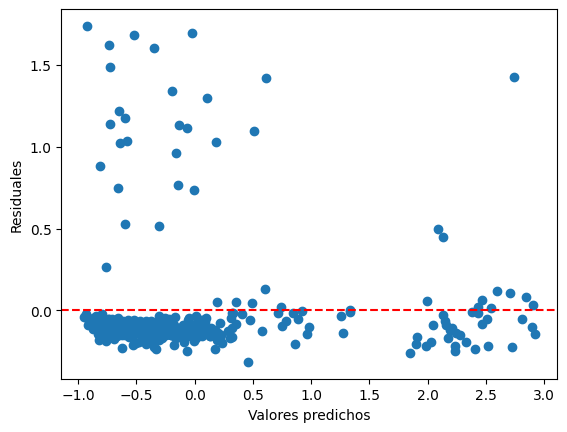

In [41]:
residuals = np.subtract(y_test,y_pred.reshape(-1))
plt.scatter(y_pred,residuals)
plt.axhline(y=0,color='r',linestyle='--')
plt.xlabel('Valores predichos')
plt.ylabel('Residuales')
plt.plot()

## Tercer modelo

In [30]:
x_cols = ['age2','children','sobrepeso_fumador','smoker_yes'] # Se está seleccionando las columnas que poseen un p_value < 0.05 porque estas son las más representativas
y_col = ['charges'] # Variable a predecir

x_medical = medical_costs_2[x_cols].values
y_medical = medical_costs_2[y_col].values

# Obtención de los conjuntos de datos de datos de entrenamiento (train) y prueba (test), el 75% se utilizan para entrenamiento y 25% para pruebas
x_train, x_test, y_train, y_test = train_test_split(x_medical,y_medical,test_size=0.25,random_state=42)

# Estandarización de los datos 

# Variables independientes
sc_x= StandardScaler().fit(x_medical)
x_train = sc_x.transform(x_train)
x_test = sc_x.transform(x_test)

# Variables dependientes
sc_y= StandardScaler().fit(y_medical)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

# Creación y entrenamiento del modelo de regresión lineal 

model = LinearRegression(fit_intercept=False)
model.fit(x_train, y_train)

# Se realizan predicciones a partir del modelo y con los datos de prueba (test)

y_pred = model.predict(x_test)
y_pred.shape # Cantidad de valores predichos de la variable 'charges'

(335, 1)

In [31]:
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
R2 = metrics.r2_score(y_test,y_pred)

print(f'Error absoluto medio (MAE) : {MAE.round(4)}')
print(f'Error medio cuadrado (MSE) : {MSE.round(4)}')
print(f'Coeficiente de determinación (R2) : {R2.round(4)}')

Error absoluto medio (MAE) : 0.2004
Error medio cuadrado (MSE) : 0.1334
Coeficiente de determinación (R2) : 0.8704


In [33]:
y_test = y_test.reshape(-1)
model.coef_ = model.coef_.reshape(-1)
print('*'*16,'Summary','*'*16)
stats.summary(model,x_test,y_test,x_cols)

**************** Summary ****************
Residuals:
    Min     1Q  Median     3Q    Max
-1.7548 0.0703  0.1104 0.1489 0.3197


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept         0.000000    0.019968   0.0000  1.000000
age2               0.314040    0.019801  15.8597  0.000000
children           0.062210    0.019951   3.1182  0.001978
sobrepeso_fumador  0.512369    0.025483  20.1062  0.000000
smoker_yes         0.444002    0.026309  16.8766  0.000000
---
R-squared:  0.87042,    Adjusted R-squared:  0.86885
F-statistic: 554.18 on 4 features


[]

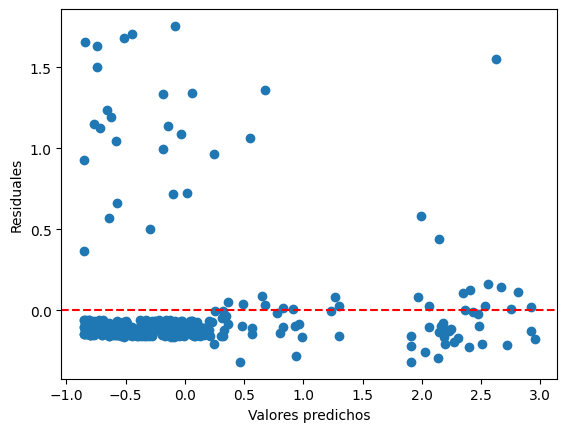

In [34]:
residuals = np.subtract(y_test,y_pred.reshape(-1))
plt.scatter(y_pred,residuals)
plt.axhline(y=0,color='r',linestyle='--')
plt.xlabel('Valores predichos')
plt.ylabel('Residuales')
plt.plot()